Initial setup

In [1]:
%run "Common setup.ipynb"

In [2]:
RC = mk.RecordCollection("{}/rest_filtered_corpora.txt".format(TMP_DIR))
corpora_df = wosis.rc_to_df(RC)

In [3]:
corpora_df.to_csv('{}/corpora_rest.csv'.format(DATA_DIR))

In [4]:
# Checking if expected paper is in corpora
corpora_df.loc[corpora_df['DOI'] == '10.1016/j.jocs.2015.08.008', :]

,AU,DE,DOI,SO,abstract,copyright,id,keywords,title,year
8673,"Feinberg, J|Langtangen, HP",uncertainty quantification polynomial chaos ex...,10.1016/j.jocs.2015.08.008,JOURNAL OF COMPUTATIONAL SCIENCE,"The paper describes the philosophy, design, fu...",Published by Elsevier B.V.,WOS:000367774700005,,Chaospy: An open source tool for designing met...,2015


<hr>

Criteria analysis of filtered corpora: <br>
- Search papers in topic of interest by keyword
- Run criteria search on filtered corpora
- Plot trend in criteria matches

Plotting the publication trend of papers that have Global Sensitivity Analysis related keywords in their title, abstract and author supplied keywords (the 'searched fields')

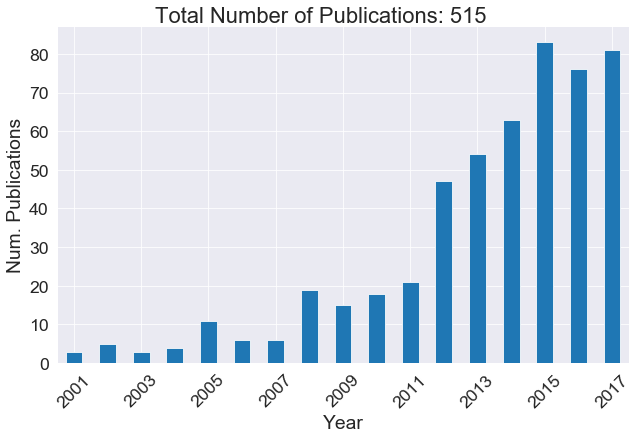

In [5]:
gsa_keywords = ['global sensitivity analysis', 'GSA', 'global sensitivity']
gsa_matches = wosis.keyword_matches(RC, gsa_keywords, threshold=95.0)
gsa_publications = gsa_matches.combine_recs()
gsa_publications.name = 'GSA'

wos_plot.plot_pub_trend(gsa_publications)

Papers with GSA related keywords occuring in the searched fields have been increasing, both in absolute and relative terms compared against the filtered corpora

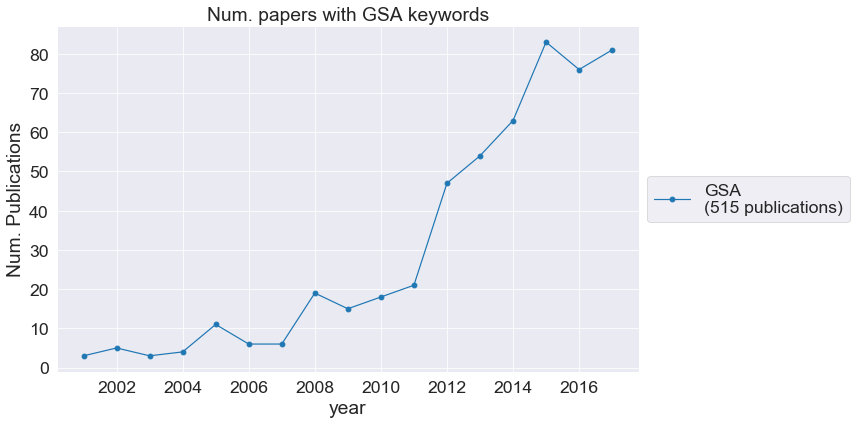

In [6]:
wos_plot.plot_topic_trend([gsa_publications], title='Num. papers with GSA keywords', 
                          save_plot_fn='{}/gsa_topic_trend_2000-2017.png'.format(FIG_DIR))

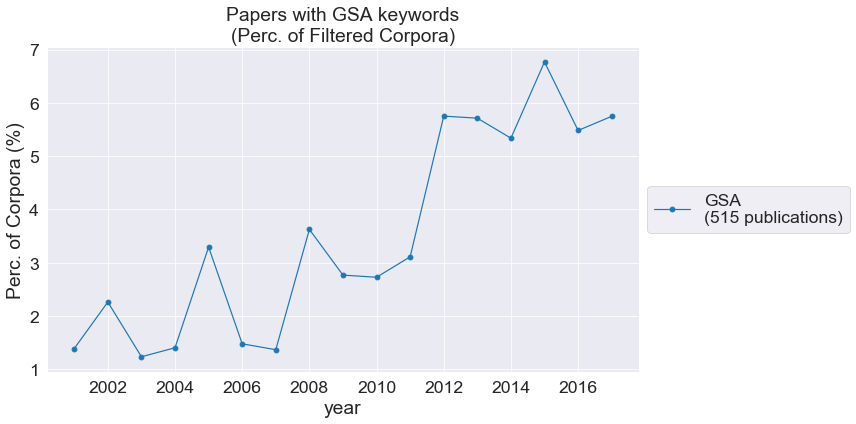

In [7]:
wos_plot.plot_topic_trend([gsa_publications], 
                          total_rc=RC, 
                          title='Papers with GSA keywords\n(Perc. of Filtered Corpora)', 
                          save_plot_fn='{}/gsa_topic_trend_perc_2000-2017.png'.format(FIG_DIR))

In [8]:
gsa_df = wosis.rc_to_df(gsa_publications)

In [9]:
gsa_df.to_csv('../data/gsa_matches_2000-2017.csv')